In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from math import floor
from prophet import Prophet

import os 



np.random.seed(9001)
#WHAT!? 9000!?!?

In [46]:
path = r"C:/Users/TurnerJosh/Desktop/SensitiveData/GoodSalesData1.xlsx"
df = pd.read_excel(path)

In [47]:
df.head(5)

,Charge Type,Order Type,Sales Invoice Count,Charge Amount,COGS Amount,Cost Adjustment Amount,Cost Amount,Discount Amount,Invoice Amount,Invoice Date
0,NaN,Sales,4417,0,93727,-9636,103364,-2654,360941,2020-06-06
1,SHIP,Sales,4415,60058,0,0,0,0,60058,2020-06-06
2,NaN,Sales,3510,0,1007245,1641,1005604,-3101,2417087,2021-01-15
3,SHIP,Sales,3340,35185,0,0,0,0,35185,2021-01-15
4,NaN,Sales,2876,0,1163022,22610,1140412,-5109,2635063,2020-11-10


In [26]:
df.sort_values("Invoice Date",inplace=True)

In [27]:
#Prophet demands columns be designated as ds and y
df=df.rename(columns={'Invoice Date':'ds','Charge Amount':'y'})

In [28]:
trainInd=floor(len(df)*.8)
valInd=floor(len(df)*.9)
train=df.loc[:trainInd,:]
val=df['ds'][trainInd:valInd]
val=val.to_frame()
test=df['ds'][valInd:]
test=test.to_frame()

In [29]:
model = Prophet()
model.fit(train)

10:25:17 - cmdstanpy - INFO - Chain [1] start processing
10:25:18 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
forecast=model.predict(val)

In [31]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2022-03-15  1414.259727 -6702.663255  9157.356414
1 2022-03-16  1008.608539 -7505.718536  8288.708540
2 2022-03-16  1008.608539 -7298.714395  8604.993021
3 2022-03-16  1008.608539 -7102.711910  8872.297244
4 2022-03-16  1008.608539 -7274.850386  9247.774289


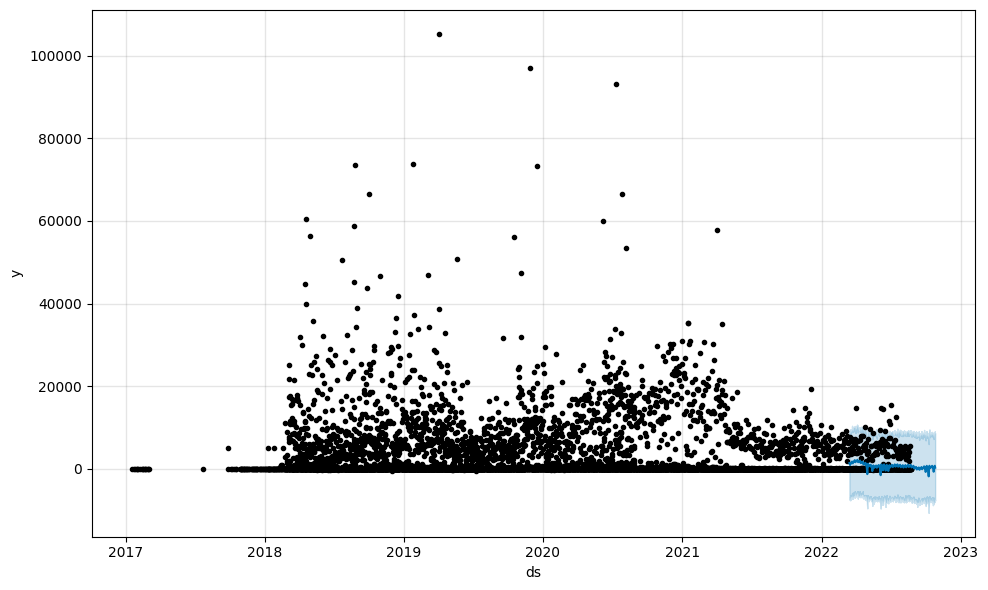

In [32]:
model.plot(forecast)
plt.show()

In [35]:
val_y=df['y'][trainInd:valInd]
y_hat=forecast.yhat

In [36]:
val_y=val_y.to_numpy()
y_hat=y_hat.to_numpy()

In [37]:
rss=((val_y-y_hat)**2).sum()
mse=np.mean((val_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((val_y-y_hat)**2)))

Final rmse value is = 2455.4909461638813


In [38]:
forecast=model.predict(test)

In [39]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat   yhat_lower   yhat_upper
0 2022-10-26  309.439146 -7610.002787  8426.349463
1 2022-10-26  309.439146 -7555.729363  8080.022247
2 2022-10-27  202.002845 -7785.271494  7724.238749
3 2022-10-27  202.002845 -7978.705842  8682.559341
4 2022-10-27  202.002845 -7618.891668  7961.025521


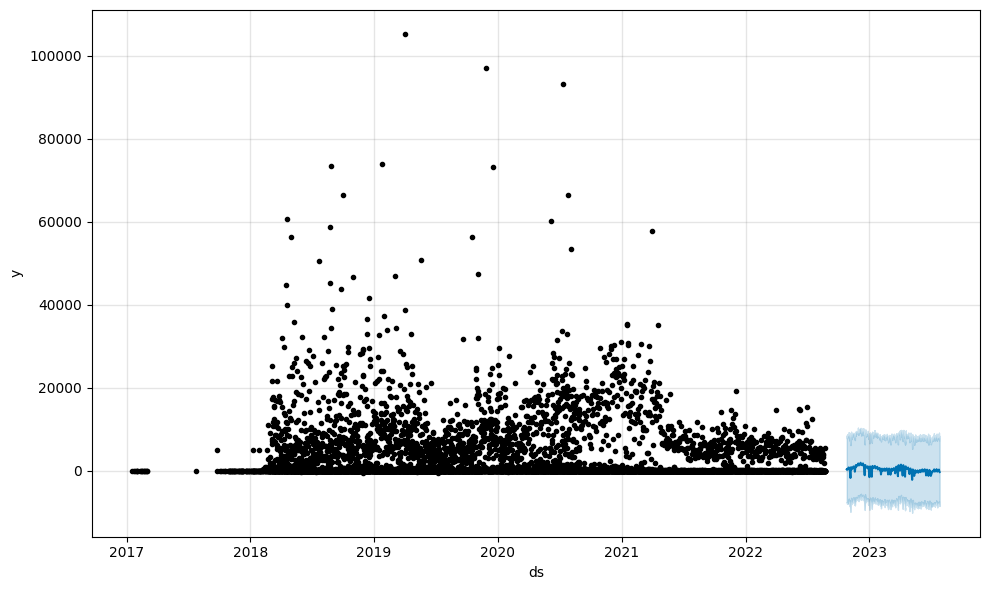

In [40]:
model.plot(forecast)
plt.show()

In [41]:
test_y=df['y'][valInd:]
y_hat=forecast.yhat

In [42]:
test_y=test_y.to_numpy()
y_hat=y_hat.to_numpy()

In [48]:
rss=((test_y-y_hat)**2).sum()
mse=np.mean((test_y-y_hat)**2)
print("Final mse value is =",mse)
print("Final rmse value is =",np.sqrt(np.mean((test_y-y_hat)**2)))

Final mse value is = 4340001.954095315
Final rmse value is = 2083.267134597797


In [ ]:
pickle.dump(model,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/W_Corp_Prophet.sav','wb'))